The main components that compose a DenseNet are *dense blocks* and *transition layers*. The former define how the inputs and outputs are concatenated, while the latter control the number of
channels so that it is not too large.
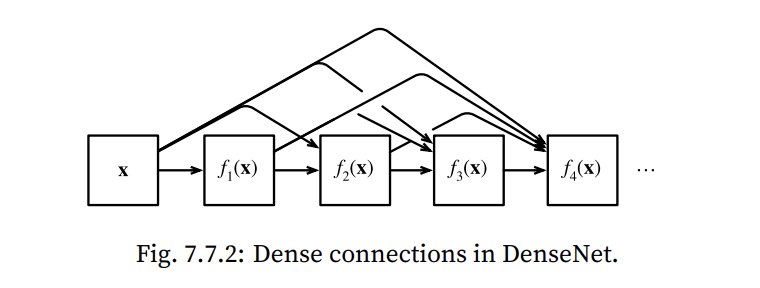
Try to fugure out the dense blocks.  
In forward step, connect the inputs and outputs of each block on the channel dimension.

In [23]:
import torch
from torch import nn

In [24]:
def conv_block(input_channels, num_channels):
	return nn.Sequential(
		nn.BatchNorm2d(input_channels), nn.ReLU(),
		nn.Conv2d(input_channels, num_channels, kernel_size=3, padding=1)
	)

In [25]:
class DenseBlock(nn.Module):
	def __init__(self, num_convs, input_channels, num_channels):
		super().__init__()
		layer = []
		for i in range(num_convs):
			layer.append(conv_block(num_channels * i + input_channels, num_channels))
		self.net = nn.Sequential(*layer)

	def forward(self, X):
		for blk in self.net:
			Y = blk(X)
			# Connect the inputs and outputs of each block on the channel dimension
			X = torch.cat((X, Y), dim=1)
		return X

In [26]:
blk = DenseBlock(2, 3, 10)
X = torch.randn(4, 3, 8, 8)
Y = blk(X)
Y.shape

torch.Size([4, 23, 8, 8])

In [27]:
print(blk.net)

Sequential(
  (0): Sequential(
    (0): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): ReLU()
    (2): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (1): Sequential(
    (0): BatchNorm2d(13, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): ReLU()
    (2): Conv2d(13, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
)


In [28]:
X = torch.randn(4, 3, 8, 8)
Y = blk.net[0](X)
Y.shape

torch.Size([4, 10, 8, 8])

In [29]:
Y = torch.cat((X, Y), dim=1)
Z = blk.net[1](Y)
Z.shape

torch.Size([4, 10, 8, 8])